# Calculate Marginal Costs for Supplement

Developed by Siobhan Powell, 2022.

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import copy
from matplotlib.gridspec import GridSpec
import pickle
from future_grid import FutureDemand

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')

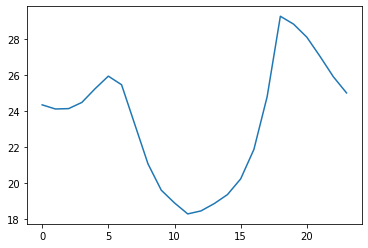

In [7]:
inds = noev_scenario[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])].index
plt.plot(noev_scenario.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0))

In [9]:
print('Mean: ', noev_scenario.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean())
print('Max on mean day : ', noev_scenario.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max())
print('Max overall : ', noev_scenario['gen_cost_marg'].max())

Mean:  23.42508287353714
Max on mean day :  29.248837757529092
Max overall :  346.9496906627906


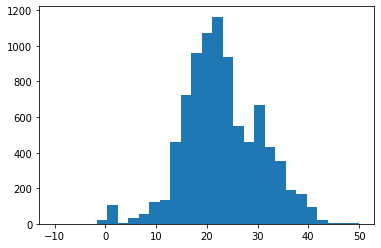

In [15]:
plt.hist(np.clip(noev_scenario['gen_cost_marg'].values, -10, 50), bins=np.linspace(-10, 50, 30))
plt.show()

In [16]:
ev_scenario1 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_BusinessAsUsual_TimersMixed_WPcontrol_minpeak_penlevel0.5_withstorage_dpdf_20220408.csv')
ev_scenario2 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_BusinessAsUsual_TimersMixed_WPcontrol_minpeak_penlevel0.5_storagebefore_withstorage_dpdf_20220408.csv')



In [17]:
print('Mean: ', ev_scenario1.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean())
print('Max on mean day : ', ev_scenario1.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max())
print('Max overall : ', ev_scenario1['gen_cost_marg'].max())

Mean:  26.37154226573158
Max on mean day :  44.34107427954675
Max overall :  647.8766261627908


In [18]:
print('Mean: ', ev_scenario2.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean())
print('Max on mean day : ', ev_scenario2.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max())
print('Max overall : ', ev_scenario2['gen_cost_marg'].max())

Mean:  24.664823836547967
Max on mean day :  27.68364319843406
Max overall :  45.65679971409865


In [29]:
results_df = pd.DataFrame(np.zeros((4, 6)), index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'], 
                          columns=['No Storage - Mean', 'No Storage - Max on Mean Weekday', 'No Storage - Max', 'Storage - Mean', 'Storage - Max on Mean Weekday', 'Storage - Max'])

for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    ev_scenario1 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_withstorage_dpdf_20220408.csv')
    ev_scenario2 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_storagebefore_withstorage_dpdf_20220408.csv')
    results_df.loc[scenario, 'No Storage - Mean'] = ev_scenario1['gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean()
    results_df.loc[scenario, 'No Storage - Max on Mean Weekday'] = ev_scenario1.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max()
    results_df.loc[scenario, 'No Storage - Max'] = ev_scenario1['gen_cost_marg'].max()
    results_df.loc[scenario, 'Storage - Mean'] = ev_scenario2['gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean()
    results_df.loc[scenario, 'Storage - Max on Mean Weekday'] = ev_scenario2.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max()
    results_df.loc[scenario, 'Storage - Max'] = ev_scenario2['gen_cost_marg'].max()



In [30]:
noev_scenario2 = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_storagebefore_dpdf_20220408.csv')

results_df.loc['No EVs', 'No Storage - Mean'] = noev_scenario['gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean()
results_df.loc['No EVs', 'No Storage - Max on Mean Weekday'] = noev_scenario.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max()
results_df.loc['No EVs', 'No Storage - Max'] = noev_scenario['gen_cost_marg'].max()


results_df.loc['No EVs', 'Storage - Mean'] = noev_scenario2['gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).mean()
results_df.loc['No EVs', 'Storage - Max on Mean Weekday'] = noev_scenario2.loc[inds, 'gen_cost_marg'].values.reshape(-1, 24).mean(axis=0).max()
results_df.loc['No EVs', 'Storage - Max'] = noev_scenario2['gen_cost_marg'].max()


In [31]:
results_df.round(2)

,No Storage - Mean,No Storage - Max on Mean Weekday,No Storage - Max,Storage - Mean,Storage - Max on Mean Weekday,Storage - Max
UniversalHome,26.34,52.74,649.84,24.17,28.65,49.33
HighHome,25.35,44.73,647.88,24.08,27.76,45.67
LowHome_HighWork,24.60,39.01,647.88,23.96,26.90,43.49
LowHome_LowWork,24.61,39.12,647.88,23.95,26.97,43.92
No EVs,23.01,29.25,346.95,22.63,25.67,40.98


In [ ]:
# Mean $/MWh = 25
# The max is what's driving the need for storage: 650 is expensive!
# Max on typical weekday is $39 - 53 / MWh

# Storage is 7.5 GW = 30,000 kWh vs 4.2 GW  = 16,800 kWh at 143 or 299 $/kWh
# 

In [33]:
for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    ev_scenario1 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_withstorage_dpdf_20220408.csv')
    ev_scenario1.
#     ev_scenario2 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_storagebefore_withstorage_dpdf_20220408.csv')


16800.0

In [37]:
1460000000 / ev_scenario1.gen_cost_tot.sum()

0.2193033554983558

In [38]:
1460000000 / ev_scenario1.total_incl_noncombustion.sum()

1.6641547619849126

In [39]:
ev_scenario1.gen_cost_tot.sum() / ev_scenario1.total_incl_noncombustion.sum()

7.588368897517345

In [45]:
results_df = pd.DataFrame(np.zeros((4, 6)), index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'], 
                          columns=['No Storage - Mean Price [$/MWh]', 'No Storage - Total Cost [$]', 'No Storage - Total Demand [MWh]', 'Storage - Mean Price [$/MWh]', 'Storage - Total Cost [$]', 'Storage - Total Demand [MWh]'])

for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    ev_scenario1 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_withstorage_dpdf_20220408.csv')
    ev_scenario2 = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scenario+'_TimersNone_noWPcontrol_penlevel0.5_storagebefore_withstorage_dpdf_20220408.csv')
    results_df.loc[scenario, 'No Storage - Mean Price [$/MWh]'] = ev_scenario1['gen_cost_tot'].sum() / ev_scenario1['total_incl_noncombustion'].sum()
    results_df.loc[scenario, 'No Storage - Total Cost [$]'] = ev_scenario1['gen_cost_tot'].sum()
    results_df.loc[scenario, 'No Storage - Total Demand [MWh]'] =  ev_scenario1['total_incl_noncombustion'].sum()
    results_df.loc[scenario, 'Storage - Mean Price [$/MWh]'] = ev_scenario2['gen_cost_tot'].sum() / ev_scenario2['total_incl_noncombustion'].sum()
    results_df.loc[scenario, 'Storage - Total Cost [$]'] = ev_scenario2['gen_cost_tot'].sum()
    results_df.loc[scenario, 'Storage - Total Demand [MWh]'] =  ev_scenario2['total_incl_noncombustion'].sum()

results_df.loc['No EVs', 'No Storage - Mean Price [$/MWh]'] = noev_scenario['gen_cost_tot'].sum() / noev_scenario['total_incl_noncombustion'].sum()
results_df.loc['No EVs', 'No Storage - Total Cost [$]'] = noev_scenario['gen_cost_tot'].sum()
results_df.loc['No EVs', 'No Storage - Total Demand [MWh]'] =  noev_scenario['total_incl_noncombustion'].sum()
results_df.loc['No EVs', 'Storage - Mean Price [$/MWh]'] = noev_scenario2['gen_cost_tot'].sum() / noev_scenario2['total_incl_noncombustion'].sum()
results_df.loc['No EVs', 'Storage - Total Cost [$]'] = noev_scenario2['gen_cost_tot'].sum()
results_df.loc['No EVs', 'Storage - Total Demand [MWh]'] =  noev_scenario2['total_incl_noncombustion'].sum()


In [47]:
results_df.round(2)

,No Storage - Mean Price [$/MWh],No Storage - Total Cost [$],No Storage - Total Demand [MWh],Storage - Mean Price [$/MWh],Storage - Total Cost [$],Storage - Total Demand [MWh]
UniversalHome,7.78,6.836869e+09,8.789450e+08,7.58,6.659880e+09,8.789450e+08
HighHome,7.69,6.755067e+09,8.785754e+08,7.51,6.600723e+09,8.785754e+08
LowHome_HighWork,7.58,6.650478e+09,8.772452e+08,7.43,6.521608e+09,8.772452e+08
LowHome_LowWork,7.59,6.657445e+09,8.773222e+08,7.44,6.526002e+09,8.773222e+08
No EVs,6.87,5.726504e+09,8.339734e+08,6.68,5.572743e+09,8.339734e+08


In [48]:
696000000 / results_df

,No Storage - Mean Price [$/MWh],No Storage - Total Cost [$],No Storage - Total Demand [MWh],Storage - Mean Price [$/MWh],Storage - Total Cost [$],Storage - Total Demand [MWh]
UniversalHome,8.947747e+07,0.101801,0.791858,9.185537e+07,0.104506,0.791858
HighHome,9.052294e+07,0.103034,0.792192,9.263962e+07,0.105443,0.792192
LowHome_HighWork,9.180733e+07,0.104654,0.793393,9.362149e+07,0.106722,0.793393
LowHome_LowWork,9.171932e+07,0.104545,0.793323,9.356668e+07,0.106650,0.793323
No EVs,1.013612e+08,0.121540,0.834559,1.041580e+08,0.124894,0.834559


In [49]:
1460000000 / results_df

,No Storage - Mean Price [$/MWh],No Storage - Total Cost [$],No Storage - Total Demand [MWh],Storage - Mean Price [$/MWh],Storage - Total Cost [$],Storage - Total Demand [MWh]
UniversalHome,1.876970e+08,0.213548,1.661082,1.926851e+08,0.219223,1.661082
HighHome,1.898901e+08,0.216134,1.661781,1.943302e+08,0.221188,1.661781
LowHome_HighWork,1.925843e+08,0.219533,1.664301,1.963899e+08,0.223871,1.664301
LowHome_LowWork,1.923997e+08,0.219303,1.664155,1.962749e+08,0.223720,1.664155
No EVs,2.126256e+08,0.254955,1.750655,2.184923e+08,0.261989,1.750655


In [50]:
ev_scenario1.gen_cost_marg.min()

0.01